In [98]:
cd D:\STUDY\codings\ML\Project\Vision Assistant

D:\STUDY\codings\ML\Project\Vision Assistant


In [99]:
import pickle
import tensorflow as tf
from tensorflow import keras
import numpy as np
import cv2
import json
model = keras.models.load_model('adam_0.78_acc.h5')
object_classifier = keras.models.load_model("object_class.h5")
new_dict = json.load(open("decoder.json"))
inv_dict = json.load(open("encoder.json"))


 two people on a ski-lift . end


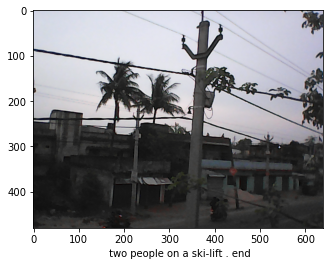

In [109]:
#locate to the directory
#pip install tensorflow
#pip install cv2
#pip install json
#pip install pyttsx3
#needs camera access
#expected png image from the camera



captured_image = np.arange(20)
camera = cv2.VideoCapture(0)
for i in range(1):
    return_value, captured_image = camera.read()

del(camera)


from glob import glob
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
count = 0
MAX_LEN = 36

test_image = cv2.cvtColor(captured_image, cv2.COLOR_BGR2RGB)
test_img = cv2.resize(test_image, (224,224))
image = test_img.reshape(1,224,224,3) 
test_feature = object_classifier.predict(image).reshape(2048,)
text_inp = ['start']
count = 0
caption = ''
while count < 25:
    count += 1

    encoded = []
    for i in text_inp:
        encoded.append(new_dict[i])

    encoded = [encoded]

    encoded = pad_sequences(encoded, padding='pre', truncating='pre', maxlen=MAX_LEN)
    test_feature = test_feature.reshape(1,2048)
    encoded = encoded.reshape(1,36)

    prediction = np.argmax(model.predict([test_feature, encoded]))
    prediction = str(prediction)

    sampled_word = inv_dict[prediction]


    caption = caption + ' ' + sampled_word

    if sampled_word == 'end':
        break

    text_inp.append(sampled_word)
print(caption)
plt.figure()
plt.imshow(test_image)
plt.xlabel(caption)
caption = caption.split('eos')[0]
import pyttsx3
engine = pyttsx3.init()
voices = engine.getProperty('voices')
engine.setProperty('voice', voices[1].id)
engine.setProperty("rate", 100)
caption = caption.split('end')[0]
engine.say(caption)
engine.say("over")
engine.runAndWait()